**Réussite au baccalauréat en fonction de l'origine sociale**

A quoi correspond chaque ligne?
Le nombre d'admis au baccalauréat pour un corps de métier pour une année

D'ou vient le dataset?
https://www.data.gouv.fr/fr/datasets/

Producteur des données : ministère de l'education nationale et de la jeunesse

Pas d'information complémentaire donnée sur le dataset.
On peut imaginer la signification suivante pour la colonne "Origine sociale" : l'origine sociale des parents (selon le métier qu'ils ont exercé?) du candidat au baccalauréat, ou bien l'origine sociale de la famille du candidat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = 'fr-en-reussite-au-baccalaureat-origine-sociale.csv'

In [2]:
df = pd.read_csv(filename, sep=';')

In [3]:
print(df)

     Année                                    Origine sociale  \
0     1997                         Professions intermédiaires   
1     1997  Professions intermédiaires : instituteurs et a...   
2     1998     Autres personnes sans activité professionnelle   
3     1999                                           Employés   
4     2000                                           Ouvriers   
..     ...                                                ...   
259   2017                                          Retraités   
260   2018          Artisans, commerçants, chefs d'entreprise   
261   2018                     dont instituteurs et assimilés   
262   2018                                          Retraités   
263   2018     Autres personnes sans activité professionnelle   

     Nombre d'admis au baccalauréat général  \
0                                     51075   
1                                      7956   
2                                      9168   
3                              

Il semblerait que les lignes de la dataframe sont triées par "Année" de manière décroissante. Vérifions le

In [4]:
import numpy as np
def is_df_sorted(df, colname):
    return (np.diff(df[colname]) > 0).all()
if not is_df_sorted(df, "Année"):
    df.sort_values('Année', inplace=True)

Origines sociale distinctes

In [5]:
os_list = df['Origine sociale'].unique()
print(os_list)

['Professions intermédiaires'
 'Cadres, professions intellectuelles supérieures' 'Indéterminé'
 'Cadres, professions intellectuelles supérieures : professeurs et assimilés'
 'Agriculteurs exploitants' 'Ensemble'
 "Artisans, commerçants, chefs d'entreprise" 'Employés' 'Ouvriers'
 'Autres personnes sans activité professionnelle'
 'Professions intermédiaires : instituteurs et assimilés' 'Retraités'
 'dont instituteurs et assimilés' 'dont professeurs et assimilés']


Evolution du nombre d'admis au baccalauréat au cours du temps

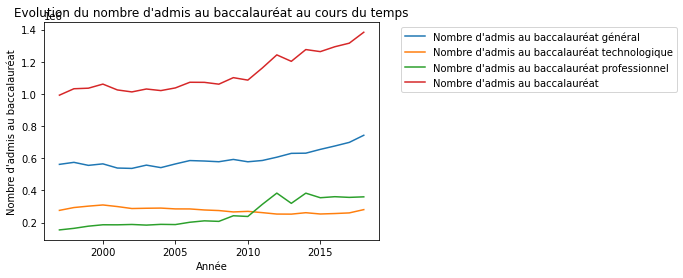

In [6]:
fig = plt.figure()
plt.title("Evolution du nombre d'admis au baccalauréat au cours du temps")
plt.xlabel('Année')
plt.ylabel('Nombre d\'admis au baccalauréat')

nb_ad_bac_g = 'Nombre d\'admis au baccalauréat général'
nb_ad_bac_t = 'Nombre d\'admis au baccalauréat technologique'
nb_ad_bac_p = 'Nombre d\'admis au baccalauréat professionnel'
nb_ad_bac = 'Nombre d\'admis au baccalauréat'

df_general = df.groupby('Année')[nb_ad_bac_g].sum()
df_techno = df.groupby('Année')[nb_ad_bac_t].sum()
df_pro = df.groupby('Année')[nb_ad_bac_p].sum()
df_all = df.groupby('Année')[nb_ad_bac].sum()

plt.plot(df_general, label=nb_ad_bac_g)
plt.plot(df_techno, label=nb_ad_bac_t)
plt.plot(df_pro, label = nb_ad_bac_p)
plt.plot(df_all, label = nb_ad_bac)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Evolution du nombres d'admis au BAC d'un exemple d'origine sociale au cours du temps

In [7]:
exemple = "Artisans, commerçants, chefs d\'entreprise"
os_name = "Origine sociale"

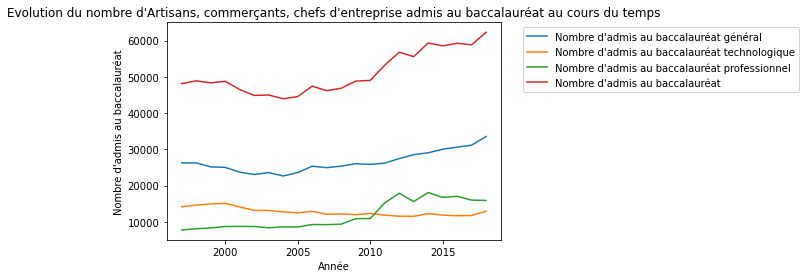

In [8]:
fig = plt.figure()
plt.title(f"Evolution du nombre d'{exemple} admis au baccalauréat au cours du temps")
plt.xlabel('Année')
plt.ylabel('Nombre d\'admis au baccalauréat')

nb_ad_bac_g = f'Nombre d\'admis au baccalauréat général'
nb_ad_bac_t = f'Nombre d\'admis au baccalauréat technologique'
nb_ad_bac_p = f'Nombre d\'admis au baccalauréat professionnel'
nb_ad_bac = f'Nombre d\'admis au baccalauréat'

df_general = df[df[os_name]==exemple]
df_techno = df[df[os_name]==exemple]
df_pro = df[df[os_name]==exemple]
df_all = df[df[os_name]==exemple]

plt.plot(df_general["Année"], df_general[nb_ad_bac_g], label=nb_ad_bac_g)
plt.plot(df_general["Année"], df_techno[nb_ad_bac_t], label=nb_ad_bac_t)
plt.plot(df_general["Année"], df_pro[nb_ad_bac_p], label = nb_ad_bac_p)
plt.plot(df_general["Année"], df_all[nb_ad_bac], label = nb_ad_bac)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Même chose mais pour toutes les origines sociales

Mettons le code précédent en fonction

In [9]:
def plot_os(os):
  fig = plt.figure()
  plt.title(f"Evolution du nombre d'(de) {os} admis au baccalauréat au cours du temps")
  plt.xlabel('Année')
  plt.ylabel('Nombre d\'admis au baccalauréat')

  nb_ad_bac_g = f'Nombre d\'admis au baccalauréat général'
  nb_ad_bac_t = f'Nombre d\'admis au baccalauréat technologique'
  nb_ad_bac_p = f'Nombre d\'admis au baccalauréat professionnel'
  nb_ad_bac = f'Nombre d\'admis au baccalauréat'

  df_general = df[df[os_name]==exemple]
  df_techno = df[df[os_name]==exemple]
  df_pro = df[df[os_name]==exemple]
  df_all = df[df[os_name]==exemple]

  plt.plot(df_general["Année"], df_general[nb_ad_bac_g], label=nb_ad_bac_g)
  plt.plot(df_general["Année"], df_techno[nb_ad_bac_t], label=nb_ad_bac_t)
  plt.plot(df_general["Année"], df_pro[nb_ad_bac_p], label = nb_ad_bac_p)
  plt.plot(df_general["Année"], df_all[nb_ad_bac], label = nb_ad_bac)

  plt.legend(bbox_to_anchor=(1.05, 1))
  plt.show()

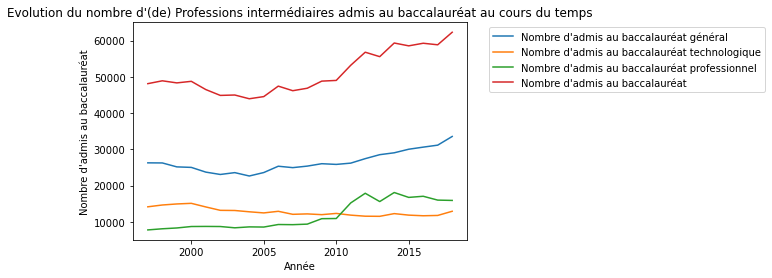

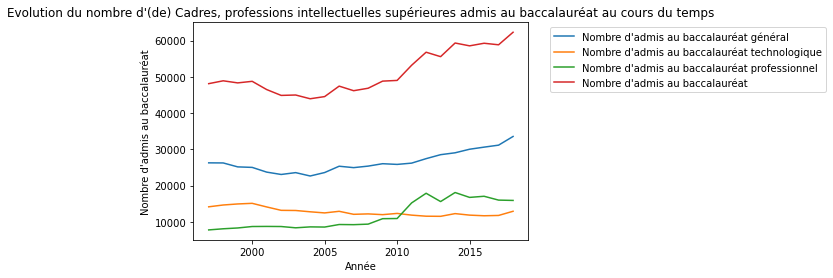

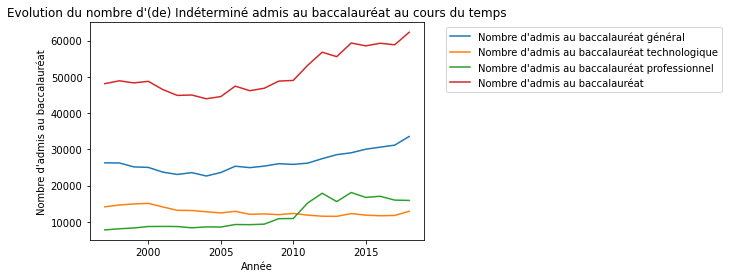

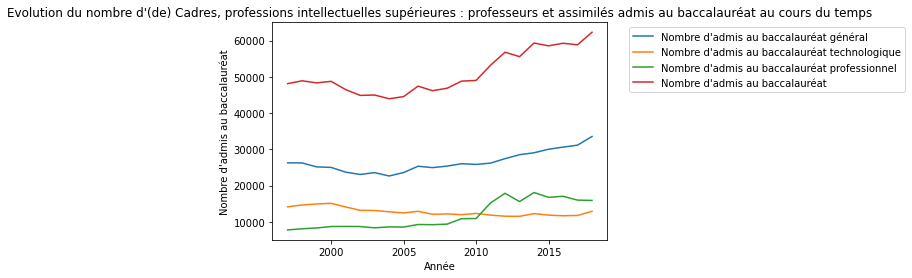

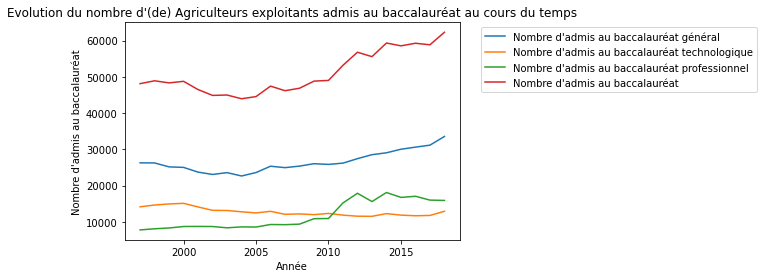

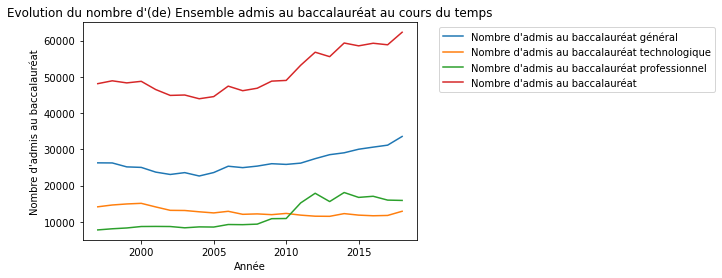

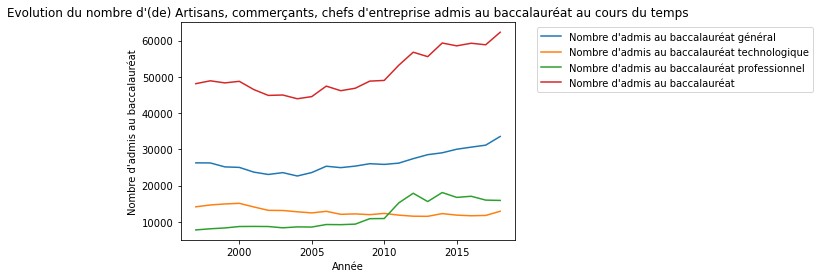

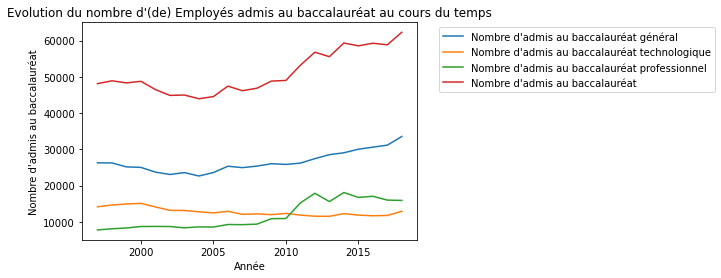

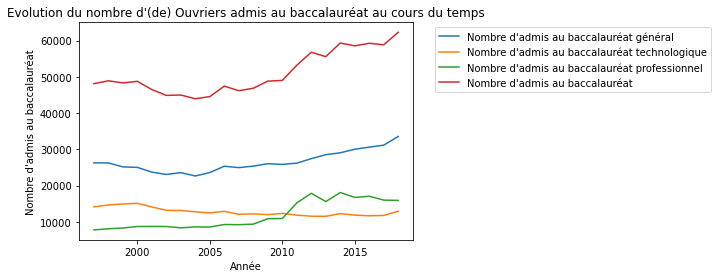

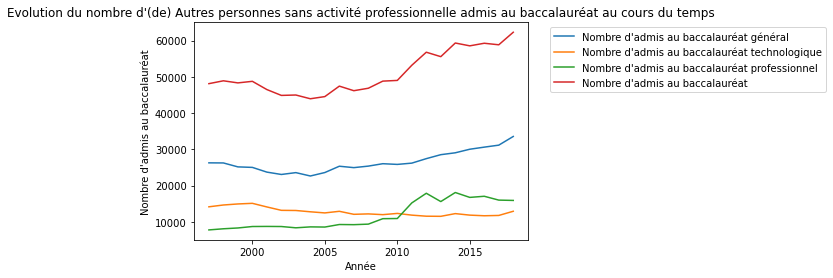

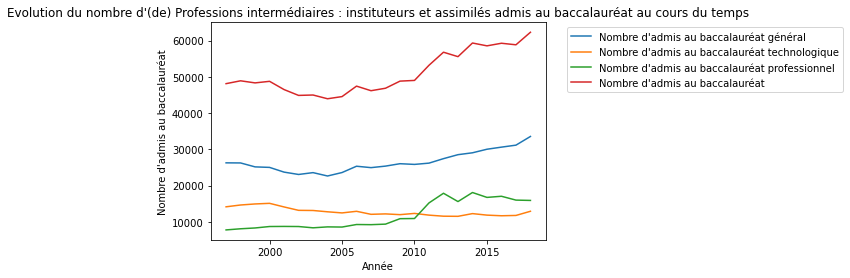

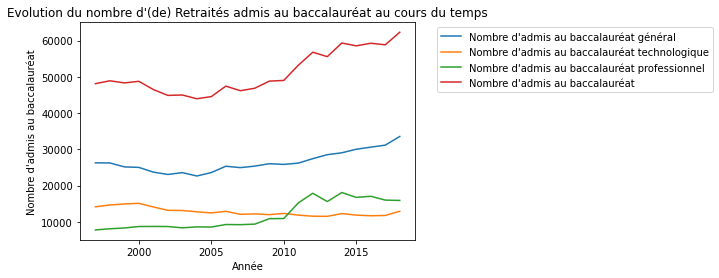

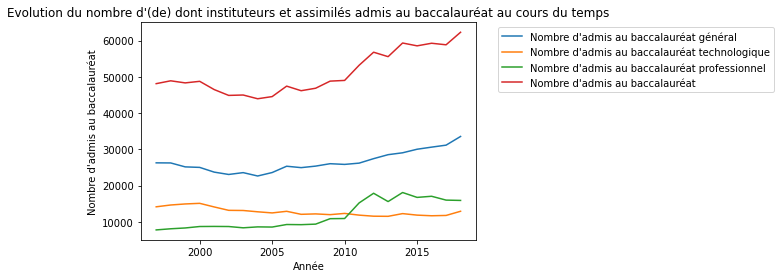

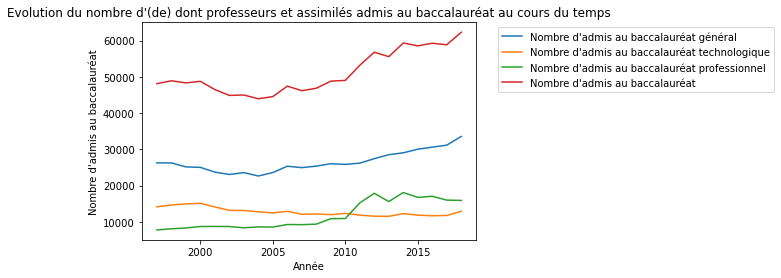

In [10]:
for os in os_list:
  plot_os(os)

In [11]:
pt = pd.pivot_table(df, 
                    values=[nb_ad_bac_g, nb_ad_bac_t, nb_ad_bac_p, nb_ad_bac], 
                    index=['Année'], 
                    columns=["Origine sociale"])

In [12]:
print(pt)

                Nombre d'admis au baccalauréat  \
Origine sociale       Agriculteurs exploitants   
Année                                            
1997                                   15724.0   
1998                                   17904.0   
1999                                   17899.0   
2000                                   18140.0   
2001                                   17103.0   
2002                                   16528.0   
2003                                   16367.0   
2004                                   15962.0   
2005                                   16022.0   
2006                                   15743.0   
2007                                   11679.0   
2008                                   11195.0   
2009                                   11255.0   
2010                                   10899.0   
2011                                   10798.0   
2012                                   11286.0   
2013                                   10619.0   


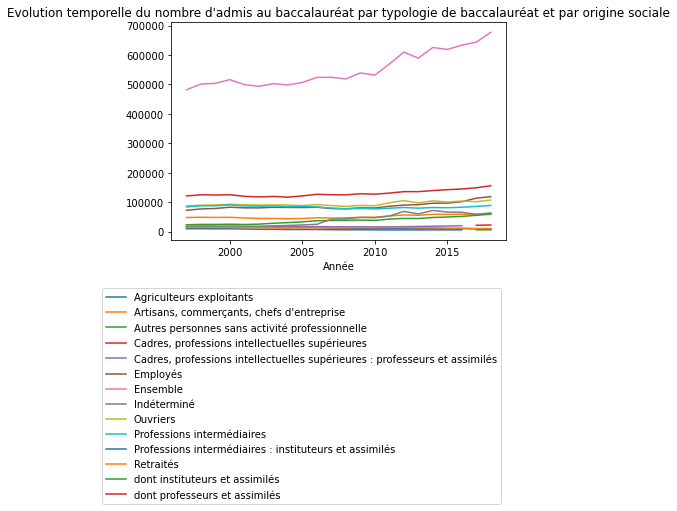

In [30]:
title = f"Evolution temporelle du nombre d'admis au baccalauréat par typologie de baccalauréat et par origine sociale"
pt.plot(y=pt.columns.to_list(), title = title).legend(bbox_to_anchor=(1, -0.2));

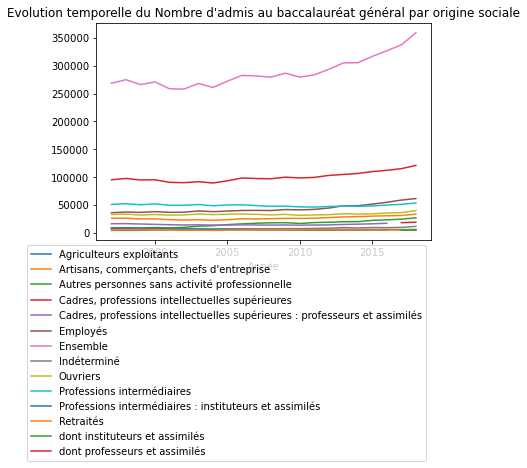

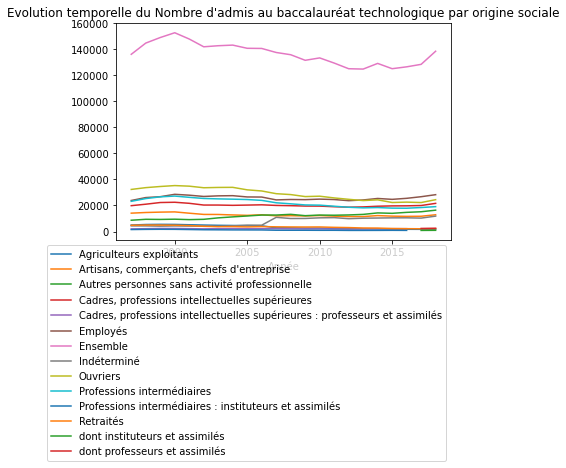

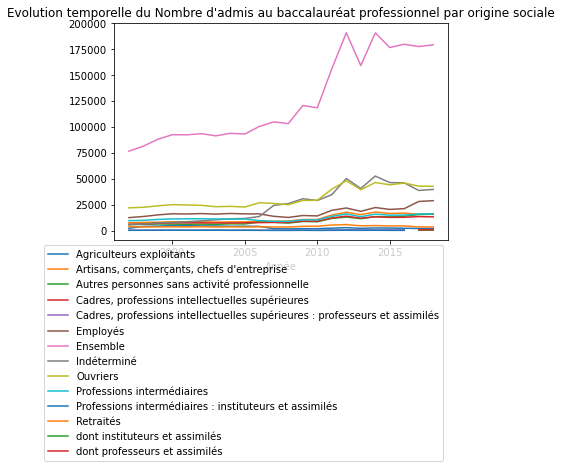

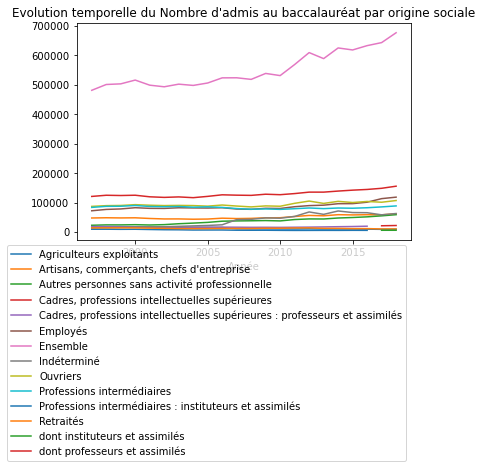

In [29]:
for type_de_bac in [nb_ad_bac_g, nb_ad_bac_t, nb_ad_bac_p, nb_ad_bac]:
    pt = pd.pivot_table(df, 
                        values=type_de_bac, 
                        index=['Année'], 
                        columns=["Origine sociale"])
    title = f"Evolution temporelle du {type_de_bac} par origine sociale"
    pt.plot(y=pt.columns.to_list(), title=title).legend(bbox_to_anchor=(1, 0));